# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.340  1  0.658 0.418 0.003   
                             age        0.006  1  0.012 0.915 0.000   
                             Kiel       1.500  1  2.903 0.090 0.015   
                             Magdeburg  4.809  1  9.311 0.003 0.046   
                             Sweden     8.089  1 15.659 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.985  1  1.034 0.311 0.005   
                             age        0.352  1  0.370 0.544 0.002   
                             Kiel       0.146  1  0.153 0.696 0.001   
                             Magdeburg  2.781  1  2.918 0.089 0.015   
                             Sweden    18.605  1 19.524 0.000 0.093   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.379  0.578    False  
                             age               0.039  0.951    False  
                             Kiel              1.046  0.193    False  
                             Magdeburg         2.585  0.011     True  
                             Sweden            3.971  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.508  0.474    False  
                             age               0.264  0.689    False  
                             Kiel              0.157  0.807    False  
                             Magdeburg         1.050  0.192    False  
                             Sweden            4.779  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.982  1  7.177 0.008 0.036   
                             age        0.008  1  0.056 0.814 0.000   
                             Kiel       0.270  1  1.972 0.162 0.010   
                             Magdeburg  0.476  1  3.477 0.064 0.018   
                             Sweden     1.696  1 12.398 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.454  1  3.004 0.085 0.015   
                             age        0.422  1  0.871 0.352 0.005   
                             Kiel       2.610  1  5.392 0.021 0.027   
                             Magdeburg  2.646  1  5.467 0.020 0.028   
                             Sweden    23.762  1 49.103 0.000 0.205   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.095  0.022     True  
                             age               0.090  0.878    False  
                             Kiel              0.791  0.267    False  
                             Magdeburg         1.195  0.127    False  
                             Sweden            3.270  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.072  0.159    False  
                             age               0.454  0.484    False  
                             Kiel              1.672  0.051    False  
                             Magdeburg         1.690  0.049     True  
                             Sweden           10.392  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.418         0.379  0.578    False   
                             Kiel      0.090         1.046  0.193    False   
                             Magdeburg 0.003         2.585  0.011     True   
                             Sweden    0.000         3.971  0.001     True   
                             age       0.915         0.039  0.951    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.311         0.508  0.474    False   
                             Kiel      0.696         0.157  0.807    False   
                             Magdeburg 0.089         1.050  0.192    False   
                             Sweden    0.000         4.779  0.000     True   
                             age       0.544         0.264  0.689    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.095  0.022     True  
                             Kiel      0.162         0.791  0.267    False  
                             Magdeburg 0.064         1.195  0.127    False  
                             Sweden    0.001         3.270  0.002     True  
                             age       0.814         0.090  0.878    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.085         1.072  0.159    False  
                             Kiel      0.021         1.672  0.051    False  
                             Magdeburg 0.020         1.690  0.049     True  
                             Sweden    0.000        10.392  0.000     True  
                             age       0.352         0.454  0.484    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.484     0.338     0.226         3.313     0.280
std       0.303         5.337     0.331     0.295         6.220     0.322
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.333     0.016     0.000         0.398     0.002
50%       0.121         0.918     0.242     0.061         1.213     0.122
75%       0.465         2.407     0.620     0.400         3.338     0.533
max       1.000       145.394     1.000     1.000        86.238     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49385/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.418         0.379   
A0A024R0T9;K7ER74;P02655                           AD     0.059         1.227   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.191         0.719   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.507         0.295   
A0A075B6H7                                         AD     0.133         0.875   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.117         0.931   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.552         0.258   
S4R3U6                                             AD     0.311         0.508   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.578    False   
A0A024R0T9;K7ER74;P02655                           AD      0.140    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.335    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.658    False   
A0A075B6H7                                         AD      0.259    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.237    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.694    False   
S4R3U6                                             AD      0.474    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.095   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.507   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.316         0.501   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.249         0.603   
A0A075B6H7                                         AD     0.013         1.881   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.208         0.682   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.872         0.060   
S4R3U6                                             AD     0.085         1.072   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.022     True  
A0A024R0T9;K7ER74;P02655                           AD      0.070    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.448    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.375    False  
A0A075B6H7                                         AD      0.034     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.397     0.337     0.247         1.546     0.309
std       0.292         1.660     0.317     0.297         1.805     0.320
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.364     0.038     0.008         0.362     0.022
50%       0.122         0.915     0.243     0.100         1.000     0.182
75%       0.433         1.943     0.591     0.435         2.100     0.566
max       0.997        25.410     0.998     1.000        20.548     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1036,947


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.418         0.379  0.578   
A0A024R0T9;K7ER74;P02655                           0.059         1.227  0.140   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.191         0.719  0.335   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.507         0.295  0.658   
A0A075B6H7                                         0.133         0.875  0.259   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.117         0.931  0.237   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.552         0.258  0.694   
S4R3U6                                             0.311         0.508  0.474   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.316   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.249   
A0A075B6H7                                            False 0.013   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.208   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.872   
S4R3U6                                                False 0.085   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.095  0.022   
A0A024R0T9;K7ER74;P02655                                   1.507  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.501  0.448   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.603  0.375   
A0A075B6H7                                                 1.881  0.034   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.284   
Q9Y6X5                                                     0.682  0.326   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.157   
Q9Y6Y9                                                     0.060  0.918   
S4R3U6                                                     1.072  0.159   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    890
PI (yes) - VAE (yes)   328
PI (no)  - VAE (yes)   146
PI (yes) - VAE (no)     57
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49385/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.418         0.379  0.578   
A0A075B6H7                                         0.133         0.875  0.259   
A0A075B6I0                                         0.025         1.595  0.071   
A0A075B6Q5                                         0.578         0.238  0.715   
A0A075B6R2                                         0.431         0.366  0.590   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.004         2.377  0.017   
Q9ULZ9                                             0.001         3.206  0.003   
Q9UP79                                             0.139         0.857  0.266   
Q9UQ52                                             0.076         1.118  0.170   
Q9Y6C2                                             0.360         0.444  0.524   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.008   
A0A075B6H7                                            False 0.013   
A0A075B6I0                                            False 0.001   
A0A075B6Q5                                            False 0.004   
A0A075B6R2                                            False 0.001   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.139   
Q9ULZ9                                                 True 0.027   
Q9UP79                                                False 0.000   
Q9UQ52                                                False 0.001   
Q9Y6C2                                                False 0.006   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.095  0.022   
A0A075B6H7                                                 1.881  0.034   
A0A075B6I0                                                 3.125  0.003   
A0A075B6Q5                                                 2.362  0.013   
A0A075B6R2                                                 3.074  0.003   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         0.858  0.235   
Q9ULZ9                                                     1.564  0.062   
Q9UP79                                                     4.622  0.000   
Q9UQ52                                                     3.240  0.002   
Q9Y6C2                                                     2.242  0.017   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A075B6H7                                             True        91  
A0A075B6I0                                             True       194  
A0A075B6Q5                                             True       104  
A0A075B6R2                                             True       164  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9ULZ9                                                False       171  
Q9UP79                                                 True       135  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.578,0.022,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.140,0.070,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.335,0.448,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.658,0.375,196,PI (no) - VAE (no)
A0A075B6H7,0.259,0.034,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.284,197,PI (no) - VAE (no)
Q9Y6X5,0.237,0.326,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.157,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P51674;P51674-2;P51674-3,0.975,0.012,55,PI (no) - VAE (yes),0.963
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.000,0.961,66,PI (yes) - VAE (no),0.961
P37802;P37802-2;X6RJP6,0.048,0.999,110,PI (yes) - VAE (no),0.951
P51688,0.966,0.032,58,PI (no) - VAE (yes),0.934
Q16853;Q16853-2,0.958,0.030,167,PI (no) - VAE (yes),0.928
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.056,0.045,197,PI (no) - VAE (yes),0.011
P00740;P00740-2,0.053,0.043,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


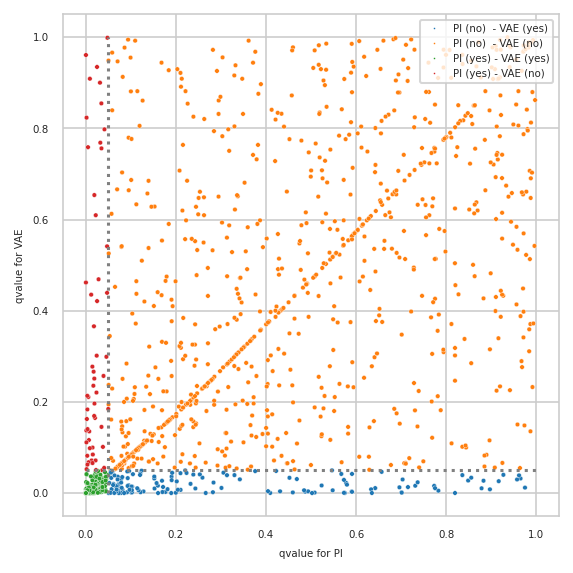

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


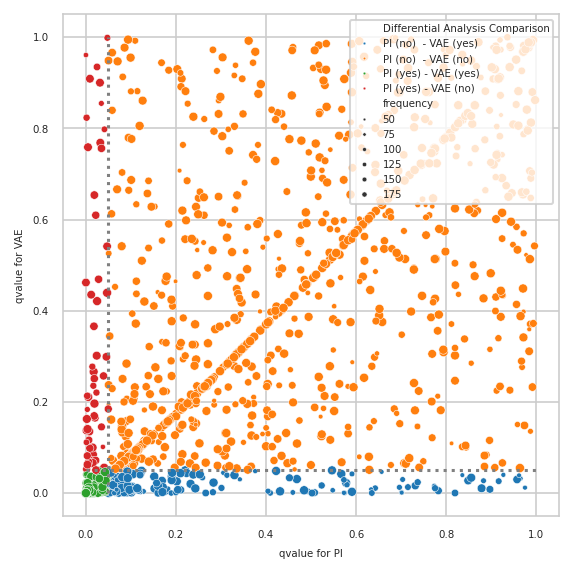

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
TSPYL2,ENSP00000364591,0.681
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out